In [1]:
#Imports the method used for connecting to Postgres Database
from sqlalchemy import create_engine
import psycopg2

#import password file using for the Postgres
from pass_key import password

# Create Engine
engine = create_engine(('postgresql+psycopg2://postgres:'+ password+'@localhost/employee_db'))
connection = engine.connect()

In [2]:
#import methods for histogram and bar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
# Query all the record from the salaries table

data = pd.read_sql("SELECT * FROM salaries", connection)
data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


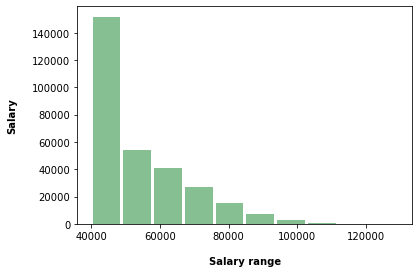

In [4]:
#Plot the histogram chart
ax = data.hist(column='salary', grid=False, color='#86bf91', zorder=2, rwidth=0.9)

#Set x-axis label
plt.xlabel ("Salary range", labelpad = 15, weight = 'bold', size = 10)

#set y-axis label
plt.ylabel ("Salary", labelpad=15, weight ='bold', size = 10)

#remove title
plt.title("")
plt.show()

# Create a bar chart of average salary by title.

In [5]:
# Query all the record from the employees table

emp_data = pd.read_sql("SELECT * FROM employees", connection)
emp_data.head()

,emp_no,emp_title,birth_day,first_name,last_name,sex,hire_date
0,455423,e0003,1960-05-05,Aamer,Koyama,M,1990-07-07
1,262129,e0003,1954-03-08,Moon,Schnabel,F,1990-09-08
2,101561,s0001,1953-07-12,Arch,Hebden,F,1989-02-13
3,466636,s0001,1953-10-31,Hugh,Munro,M,1991-04-19
4,109470,s0001,1954-07-10,Aram,Moffat,M,1985-02-14


In [6]:
# Query all the record from the titles table

titles_data = pd.read_sql("SELECT * FROM titles", connection)
titles_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
#Join employees and salaries tables together
emp_sal_join = pd.merge (data,emp_data, how='inner', on ='emp_no')
emp_sal_join

,emp_no,salary,emp_title,birth_day,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,1956-09-05,Patricia,Breugel,M,1993-10-13


In [14]:
#sort newly join table by "emp_title" group. Then calculate the salary average and remove the index column
emp_sal_join = (round(emp_sal_join.groupby(["emp_title"]).mean(["salary"]),2)).reset_index()
emp_sal_rename = emp_sal_join.rename(columns ={"salary": "Average Salary", "emp_title":"title_id"})
emp_sal = emp_sal_rename[["title_id","Average Salary"]]
emp_sal

,title_id,Average Salary
0,e0001,48564.43
1,e0002,48535.34
2,e0003,48506.80
3,e0004,48582.90
4,m0001,51531.04
5,s0001,58465.38
6,s0002,58550.17


In [15]:
#Merge emp_sal table with titles table
df_merge = pd.merge (emp_sal,titles_data, how='inner', on ='title_id')

#remove unrelevant column
df_merge = df_merge[["Average Salary", "title"]]
df_merge

,Average Salary,title
0,48564.43,Assistant Engineer
1,48535.34,Engineer
2,48506.80,Senior Engineer
3,48582.90,Technique Leader
4,51531.04,Manager
5,58465.38,Staff
6,58550.17,Senior Staff


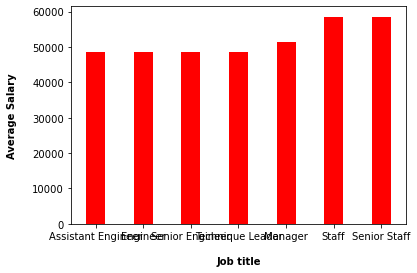

In [21]:
# Plot the data to the bar chart.
x_value = df_merge['title']
y_value = df_merge['Average Salary']
plt.bar(x_value, y_value, color = 'red', width = 0.4)
plt.xlabel ("Job title",labelpad = 15, weight = 'bold', size = 10)
plt.ylabel ("Average Salary",labelpad = 15, weight = 'bold', size = 10)
plt.show()